# Overfitting and Underfitting
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

## Program for understanding Overfitting and Underfitting

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [109]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [110]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

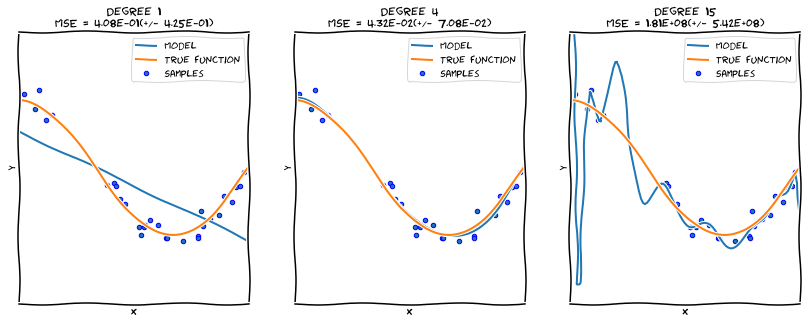

In [111]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Overfitting (Printing accuracy at different steps)
## https://machinelearningmastery.com/overfitting-machine-learning-models/

In [112]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [113]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [114]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [115]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

In [116]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.763, test: 0.767
>2, train: 0.804, test: 0.805
>3, train: 0.871, test: 0.868
>4, train: 0.906, test: 0.890
>5, train: 0.924, test: 0.901
>6, train: 0.937, test: 0.912
>7, train: 0.947, test: 0.917
>8, train: 0.956, test: 0.914
>9, train: 0.966, test: 0.917
>10, train: 0.975, test: 0.911
>11, train: 0.981, test: 0.913
>12, train: 0.985, test: 0.909
>13, train: 0.990, test: 0.909
>14, train: 0.993, test: 0.907
>15, train: 0.995, test: 0.905
>16, train: 0.996, test: 0.910
>17, train: 0.997, test: 0.908
>18, train: 0.998, test: 0.904
>19, train: 0.999, test: 0.905
>20, train: 0.999, test: 0.903
>21, train: 1.000, test: 0.902
>22, train: 1.000, test: 0.905
>23, train: 1.000, test: 0.903
>24, train: 1.000, test: 0.901
>25, train: 1.000, test: 0.901
>26, train: 1.000, test: 0.906
>27, train: 1.000, test: 0.905
>28, train: 1.000, test: 0.900
>29, train: 1.000, test: 0.900
>30, train: 1.000, test: 0.908


# -------------------------------------------------------------------------------------------------------------

# Cross-validation

## https://scikit-learn.org/stable/modules/cross_validation.html

In [117]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

### Basic method to compute score

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9666666666666667

### Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)



In [119]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [120]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


### Using the different scoring parameter

In [121]:
from sklearn import metrics

scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores



array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Specified multiple metrics of predefined scorer names

In [122]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())

scores['test_recall_macro']

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### Calculate cross validation score by passing a cross validation iterator 

In [123]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

### Use an iterable yielding (train, test) splits as arrays of indices

In [124]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.97333333])

## Different type of Cross validation iterators


### K-fold


In [125]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]


### Repeated K-Fold

In [126]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### Leave One Out (LOO)

In [127]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))



[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# -------------------------------------------------------------------------------------------------------------


# Validation curve

## https://keeeto.github.io/blog/bias_variance/
## https://scikit-learn.org/stable/modules/learning_curve.html

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_train = pd.read_csv('/content/drive/MyDrive/Data For Validation Curve/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data For Validation Curve/test.csv')
df_comb = df_train.append(df_test)

X = pd.DataFrame()


In [9]:
def encode_sex(x):
    return 1 if x == 'female' else 0

def family_size(x):
    size = x.SibSp + x.Parch 
    return 4 if size > 3 else size

X['Sex'] = df_comb.Sex.map(encode_sex)
X['Pclass'] = df_comb.Pclass
X['FamilySize'] = df_comb.apply(family_size, axis=1)

In [10]:
fare_median = df_train.groupby(['Sex', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = df_train.groupby(['Sex', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Sex', 'Pclass'], right_index=True, how='left')

X['Fare'] = df_comb.Fare.fillna(join(df_comb, fare_median).FareMedian)
X['Age'] = df_comb.Age.fillna(join(df_comb, age_mean).AgeMean)

In [11]:
def quantiles(series, num):
    return pd.qcut(series, num, retbins=True)[1]

def discretize(series, bins):
    return pd.cut(series, bins, labels=range(len(bins)-1), include_lowest=True)
    
X['Fare'] = discretize(X.Fare, quantiles(df_comb.Fare, 10))
X['Age'] = discretize(X.Age, quantiles(df_comb.Age, 10))


In [12]:
X_train = X.iloc[:df_train.shape[0]]
X_test = X.iloc[df_train.shape[0]:]

y_train = df_train.Survived


In [13]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7

In [14]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [15]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    

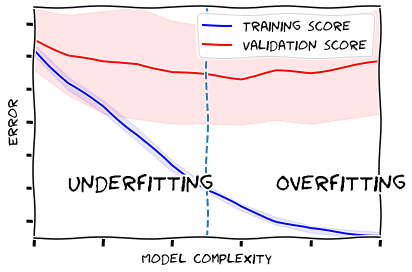

In [16]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2,13))


# -------------------------------------------------------------------------------------------------------------


# ROC
## https://www.statology.org/plot-roc-curve-python/

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [18]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

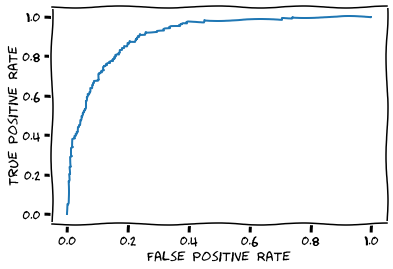

In [19]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Task 1: Perform all of the above codes of Overfitting, Cross Validation, etc. with the help of the given reference link.

# Task 2: Explain your analysis of the code. Make a detailed analysis that can also cover the following questions: (Submit the PDF of Report)

###             1) According to you, why do overfitting and underfitting occur, and how resolve them? What is the difference between them?
###             2) What kind of pattern did you analyze in the Train and Test score while running the code of overfitting?
###             3) What is cross-validation, and what did you analyze in a different type of validation that you performed?
###             4) Explain the analysis from generated ROC and validation curve and what they represent?

# Task 3: Using the given Cross Validation iterators perform all types of Cross Validations we did in the task :
	
###             1) K-fold
###             2) Repeated K-Fold
###             3) Leave One Out (LOO)

## Apart from this three, try to perform validation using three new iterators.

# Task 4: With the help of the given code and references complete all of the following step:
  
###            1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.
###            2) Try to resolve the overfitting.
###            3) Calculate the Validation score by any two or three given techniques and Validation iterators.
###           4) Generate the validation curve 
###           5) Predict the output of testing data.
###           6) Generate the ROC curve using the predicted data and actual data.

	

**TASK 3**

**K-fold and Repeated K- fold on wine dataset**

In [106]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from numpy import mean
dfw = pd.read_csv('/content/drive/MyDrive/SDAI/winequality-red.csv')

In [98]:
corr = dfw.corr()

In [100]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dfw['quality'] = pd.cut(dfw['quality'], bins = bins, labels = group_names)


In [101]:
dfw['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [103]:
X = dfw.drop('quality', axis = 1)
lb_en  = LabelEncoder()
y = lb_en.fit_transform(dfw['quality'])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Ideal: 0.896
> folds=2, accuracy=0.880 (0.876,0.884)
> folds=3, accuracy=0.887 (0.880,0.894)
> folds=4, accuracy=0.888 (0.881,0.903)
> folds=5, accuracy=0.884 (0.863,0.918)
> folds=6, accuracy=0.895 (0.879,0.906)
> folds=7, accuracy=0.892 (0.879,0.913)
> folds=8, accuracy=0.891 (0.869,0.912)
> folds=9, accuracy=0.894 (0.873,0.937)
> folds=10, accuracy=0.896 (0.875,0.922)
> folds=11, accuracy=0.897 (0.871,0.923)
> folds=12, accuracy=0.895 (0.858,0.935)
> folds=13, accuracy=0.901 (0.867,0.939)
> folds=14, accuracy=0.897 (0.857,0.934)
> folds=15, accuracy=0.892 (0.847,0.930)
> folds=16, accuracy=0.895 (0.838,0.950)
> folds=17, accuracy=0.891 (0.816,0.961)
> folds=18, accuracy=0.894 (0.845,0.944)
> folds=19, accuracy=0.898 (0.836,0.955)
> folds=20, accuracy=0.896 (0.797,0.969)
> folds=21, accuracy=0.902 (0.836,0.951)
> folds=22, accuracy=0.894 (0.845,0.948)
> folds=23, accuracy=0.897 (0.782,0.946)
> folds=24, accuracy=0.898 (0.792,0.962)
> folds=25, accuracy=0.892 (0.784,0.961)
> folds=26,

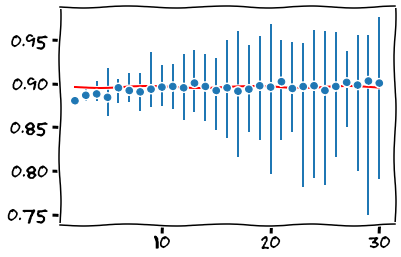

In [107]:
def get_dataset(n_samples=100):
    X, y = X_train, y_train
    return X, y

model = RandomForestClassifier()
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y = get_dataset()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return np.mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut(), model)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv, model)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

**Other 3 cross validation techniques apart from the  one's given in tutotrial**

In [20]:
#monte Carlo
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


In [21]:
#leave P groups out
from sklearn.model_selection import LeavePGroupsOut

X = np.arange(6)
y = [1, 1, 1, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3]
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[4 5] [0 1 2 3]
[2 3] [0 1 4 5]
[0 1] [2 3 4 5]


In [22]:
#group shuffle split
from sklearn.model_selection import GroupShuffleSplit

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001]
y = ["a", "b", "b", "b", "c", "c", "c", "a"]
groups = [1, 1, 2, 2, 3, 3, 4, 4]
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3] [4 5 6 7]
[2 3 6 7] [0 1 4 5]
[2 3 4 5] [0 1 6 7]
[4 5 6 7] [0 1 2 3]


**TASK 4**

**1) OVERFITTING MODEL**

In [23]:
import numpy as np
# to read our csv file
import pandas as pd
# matplotlib.pyplot is used for making graphs
import matplotlib.pyplot as plt
%matplotlib inline
# to train our model
from sklearn.ensemble import RandomForestClassifier
# to match the predicted value and real value of the predicting variable
from sklearn import metrics

In [24]:
dataset = pd.read_csv('/content/drive/MyDrive/SDAI/winequality-red.csv')

In [25]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
data_train = dataset.head(3000)
data_test = dataset.tail(1898)

In [27]:
cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
X_train=data_train[cols]
y_train=data_train.quality
X_test=data_test[cols]
y_test=data_test.quality

In [28]:
random_forest = RandomForestClassifier(n_estimators=50)  
random_forest.fit(X_train,data_train.quality)
# generate predictions on the training set
y_train_pred = random_forest.predict(X_train)

# generate predictions on the test set
y_test_pred = random_forest.predict(X_test)

metrics.accuracy_score(y_train,y_train_pred)

0.9993746091307066

In [29]:
metrics.accuracy_score(y_test, y_test_pred)

0.9993746091307066

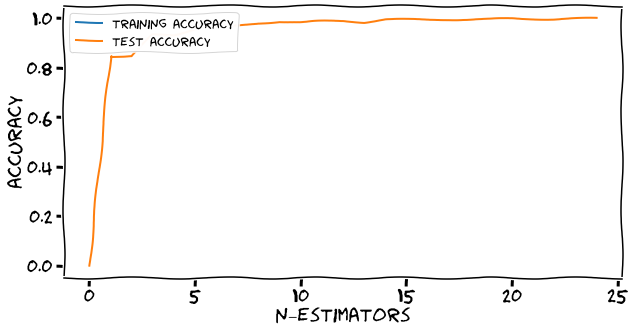

In [30]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
train_accuracies = [0]
test_accuracies = [0]
for i in range(1, 25):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    y_train_pred = random_forest.predict(X_train)
    y_test_pred = random_forest.predict(X_test)
    train_accuracy = metrics.accuracy_score(data_train.quality, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="training accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 13})
plt.xticks(range(0, 26, 5))
plt.xlabel("n_estimators", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

**1) UNDER_FITTING**

**4) Validation curve on Wine Dataset**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [31]:
dataset.columns = dataset.columns.str.replace(' ','_')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
X = dataset.drop(['quality'], axis = 1)
#y = pd.DataFrame(data['value'])
y = dataset['quality']

In [33]:
def normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_t = (X - mean)/std
    return X_t

In [34]:
def train_test(X_t, y):
    x_train, x_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.3, random_state = 42)
    print("Train:",len(x_train), " - Test:", len(x_test))
    return x_train, x_test, y_train, y_test


In [35]:
X_t = normalization(X)
print("X_t:", X_t.shape)

#Train and Test splitting of data 
x_train, x_test, y_train, y_test = train_test(X_t, y)

X_t: (1599, 11)
Train: 1119  - Test: 480


In [36]:
def plot_learning_curve(estimator,title, X, y, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [37]:
def apply_classification(name_clf, clf, x_train, x_test, y_train, y_test):
    #Find the best parameters and get the classification with the best parameters as return valu of grid search
    grid_clf = grid_search(name_clf, clf, x_train, x_test, y_train, y_test)
    
    #Plotting the learning curve
    # score curves, each time with 30% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    plot_learning_curve(grid_clf, name_clf, x_train, y_train, 
                    ylim=(0.1, 1.01), cv=cv, n_jobs=4)
    
    #Apply cross validation to estimate the skills of models with 10 split with using best parameters
    scores = cross_val_score(grid_clf, x_train, y_train, cv=10)
    print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
    print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
    print("------------------------------------------")
    
    #Predict the test data as selected classifier
    clf_prediction = grid_clf.predict(x_test)
    clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
    print("Accuracy of",name_clf,":",clf1_accuracy*100)
    
    #print confusion matrix and accuracy score before best parameters
    clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",name_clf,":\n", clf1_conf_matrix)
    print("==========================================")
    return grid_clf

In [38]:
def grid_search(name_clf, clf, x_train, x_test, y_train, y_test):
    if name_clf == 'Logistic_Regression':
        # Logistic Regression 
        log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
        grid_log_reg.fit(x_train, y_train)
        # We automatically get the logistic regression with the best parameters.
        log_reg = grid_log_reg.best_estimator_
        print("Best Parameters for Logistic Regression: ", grid_log_reg.best_estimator_)
        print("Best Score for Logistic Regression: ", grid_log_reg.best_score_)
        print("------------------------------------------")
        return log_reg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best Parameters for Logistic Regression:  LogisticRegression(C=1)
Best Score for Logistic Regression:  0.6131085842408712
------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


Mean Accuracy of Cross Validation: % 61.67
Std of Accuracy of Cross Validation: % 4
------------------------------------------
Accuracy of Logistic_Regression : 56.458333333333336
Confusion matrix of Logistic_Regression :
 [[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 146  49   0   0]
 [  0   0  73 109  18   0]
 [  0   0   4  41  16   0]
 [  0   0   0   2   4   0]]


LogisticRegression(C=1)

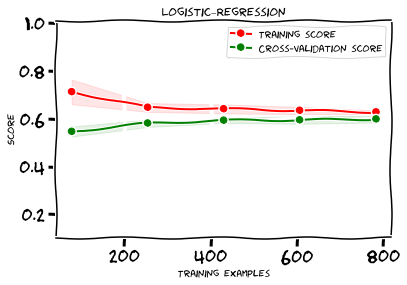

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
apply_classification('Logistic_Regression', lr, x_train, x_test, y_train, y_test)

**5) Predict the output of wines dataset**

In [131]:
print(dfw.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [133]:
dfw['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = dfw.drop(['quality','goodquality'], axis = 1)
y = dfw['goodquality']

In [134]:
dfw['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [135]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [136]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)


In [137]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



**output using RandomForest**

**6) ROC curve on Wine Dataset**

In [44]:
df = pd.read_csv('/content/drive/MyDrive/SDAI/winequality-red.csv')

In [128]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

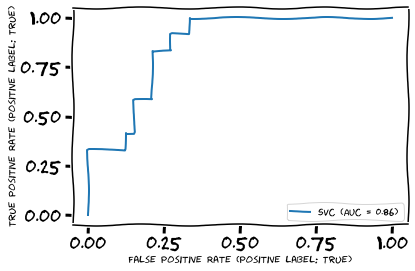

In [129]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

**Training a RandomForest and plotting the R.O.C curve**

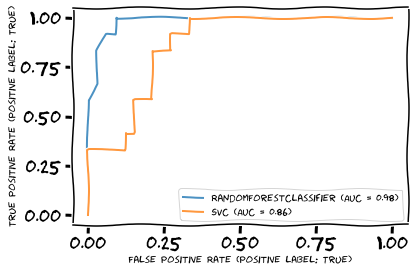

In [130]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()